In [9]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
import os
import pandas as pd

In [11]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [12]:
torch.cuda.set_device(1)

In [13]:
PATH = 'words/'
csv_path = PATH + 'csv_files/c03.csv'
n = len(list(open(csv_path))) - 1 # -1 to ignore the header line
n

4366

In [14]:

arch = resnet34
sz = 64
bs = 64
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(arch, sz)

data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, bs = bs, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [16]:
# comparing instances of dataset object and original data

# picking first image (index 0)
x1 = data.trn_ds.get_x(0)

# picking file name of first image
path = data.trn_ds.fnames[0]
x2 = plt.imread(PATH + path)
# image in grayscale, repeat it 3 times to get RGB values
x2 = np.stack((x2, x2, x2), axis = 2)



(-0.5, 122.5, 97.5, -0.5)

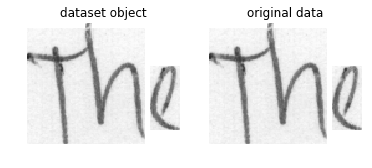

In [17]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x1)
ax[0].axis('off')
ax[0].set(title = 'dataset object')
ax[1].imshow(x2)
ax[1].set(title = 'original data')
ax[1].axis('off')

In [18]:
fn = [PATH + data.trn_ds.fnames[0]]; fn

['words/png_files/c03-000a-00-00.png']

In [19]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [20]:
learn = ConvLearner.pretrained(arch, data)

 91%|█████████ | 50/55 [00:41<00:04,  1.22it/s, loss=8.67]

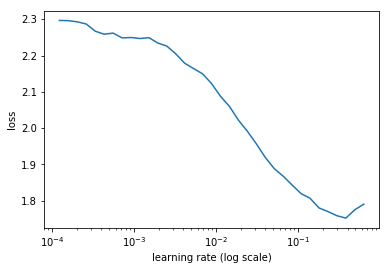

In [21]:
lrf=learn.lr_find()
learn.sched.plot()

In [22]:
lr = 0.02
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.038804   0.663928   0.751432  
    1      0.847776   0.514164   0.823597                  
    2      0.708205   0.470515   0.840779                  
    3      0.661723   0.438038   0.849943                  
    4      0.624211   0.39647    0.852234                  
    5      0.561034   0.35842    0.883162                  
    6      0.53619    0.353934   0.87858                   


[array([0.35393]), 0.8785796093094117]

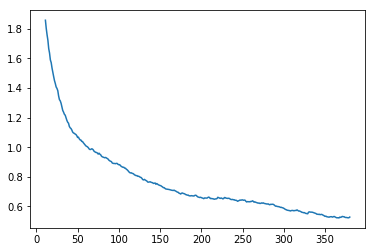

In [23]:
learn.sched.plot_loss()

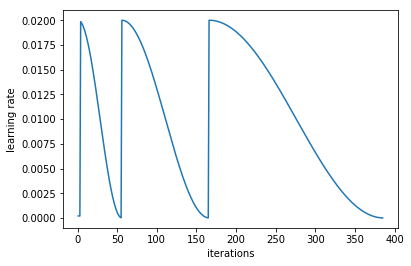

In [24]:
learn.sched.plot_lr()

In [25]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.508005   0.209837   0.924399  
    1      0.314272   0.212765   0.932417                  
    2      0.197071   0.113053   0.955326                  
    3      0.183427   0.170446   0.941581                  
    4      0.163085   0.097003   0.958763                  
    5      0.132975   0.07558    0.972509                  
    6      0.112994   0.076316   0.972509                  


[array([0.07632]), 0.9725085904508112]

In [26]:
learn.save(f'{sz}')

In [27]:
tmfs = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [32]:
data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [33]:
learn_data_agumentation = ConvLearner.pretrained(arch, data)

 85%|████████▌ | 47/55 [00:22<00:03,  2.06it/s, loss=7.73]

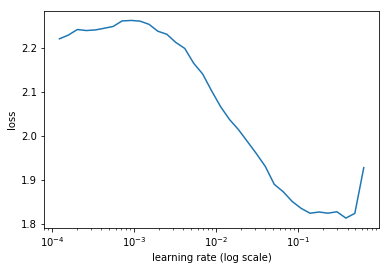

In [34]:
lrf=learn_data_agumentation.lr_find()
learn_data_agumentation.sched.plot()

In [35]:
lr = 0.02
learn_data_agumentation.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                 
    0      1.058196   0.66284    0.762887  
    1      0.818445   0.477285   0.825888                  
    2      0.689506   0.44641    0.821306                  
    3      0.66133    0.442644   0.838488                  
    4      0.61114    0.368936   0.869416                  
    5      0.544317   0.364365   0.864834                  
    6      0.514559   0.347326   0.87858                   


[array([0.34733]), 0.8785796104018221]

In [36]:
lrs = np.array([lr/9,lr/3,lr])
learn_data_agumentation.unfreeze()
learn_data_agumentation.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.448353   0.182399   0.930126  
    1      0.291579   0.132757   0.95189                   
    2      0.204588   0.112319   0.959908                  
    3      0.199117   0.137369   0.950745                  
    4      0.155998   0.102964   0.963345                  
    5      0.122801   0.092742   0.969072                  
    6      0.100233   0.087439   0.970218                   


[array([0.08744]), 0.9702176397062522]

In [37]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [39]:
accuracy_np(preds, y)

0.9736540664375716

In [40]:
multi_preds, y = learn_data_agumentation.TTA()
preds = np.mean(multi_preds, 0)

In [41]:
accuracy_np(preds,y)

0.9759450171821306